# Loneliness, Deprivation and Population Density

## (outliers are not dropped in this file)

## Read in IMD and loneliness index data for England

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
loneliness = pd.read_csv('england/final_data.csv')

## For the record, I dont think the scaling is necessary as they are already scaled.

In [95]:
z_scores = ['depression_zscore', 'alzheimers_zscore',
       'blood pressure_zscore', 'hypertension_zscore', 'diabeties_zscore',
       'cardiovascular disease_zscore', 'insomnia_zscore', 'addiction_zscore',
       'social anxiety_zscore']

In [96]:
loneliness_z = loneliness[z_scores]
loneliness_z

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore
0,-0.496546,-1.115736,-0.213050,-0.168954,-0.645499,-0.610262,-0.564285,-0.074779,-0.201186
1,-0.130188,-1.337870,0.401903,0.375216,-0.082910,0.017223,-0.556142,-0.101102,-0.316347
2,-0.442115,-1.199077,0.854120,0.906778,0.122991,0.942274,-1.073965,-0.101102,-0.257693
3,-0.075389,-1.134115,-0.420169,-0.439357,-0.448000,-0.688693,-0.817193,-0.101102,-0.059839
4,0.088668,-1.028534,-0.348092,-0.295509,-0.237027,-0.926088,0.230290,-0.063253,-0.535921
...,...,...,...,...,...,...,...,...,...
7063,-0.695193,0.174461,1.047097,1.019164,-0.649497,-0.702000,-1.110963,-0.101102,0.893232
7064,-0.396079,-0.375846,1.007852,0.956097,-0.181015,0.993619,-1.178251,-0.101102,-0.460783
7065,0.436567,-0.206876,-1.010645,-1.026337,-0.409296,-0.639128,-1.051432,-0.094154,-0.808738
7066,0.765368,0.259496,-0.732146,-0.761066,-0.843255,-0.311799,-0.921579,-0.017489,-0.591003


In [97]:
loneliness_z = loneliness_z[loneliness_z['depression_zscore'].between(-2, 2, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['alzheimers_zscore'].between(-2, 2, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['blood pressure_zscore'].between(-2, 2, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['hypertension_zscore'].between(-2, 2, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['diabeties_zscore'].between(-2, 2, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['insomnia_zscore'].between(-2, 2, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['social anxiety_zscore'].between(-2, 2, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['addiction_zscore'].between(-0.14, 0.14, inclusive=True)]
loneliness_z = loneliness_z[loneliness_z['cardiovascular disease_zscore'].between(-2, 2, inclusive=True)]

#loneliness_z = loneliness_z[loneliness_z[].between(-2, 2, inclusive=True)]

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_zscores = scaler.fit_transform(loneliness_z)
df = pd.DataFrame(data=scaled_zscores, columns=z_scores)


<AxesSubplot:ylabel='Density'>

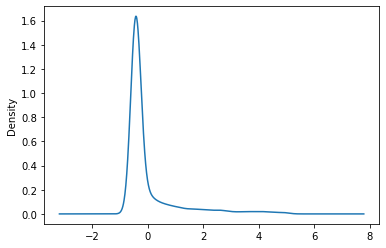

In [99]:
df["addiction_zscore"].plot.density()

## does it make more sense to keep the outliers and use a more outlier resistant clustering aka gaussian?

In [100]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [101]:
kmeans.fit(lonely_scaled_zscores)

KMeans(init='random', n_clusters=10, random_state=42)

## Perform Dimensionality Reduction using TSNE

In [102]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4466 samples in 0.005s...
[t-SNE] Computed neighbors for 4466 samples in 0.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4466
[t-SNE] Computed conditional probabilities for sample 2000 / 4466
[t-SNE] Computed conditional probabilities for sample 3000 / 4466
[t-SNE] Computed conditional probabilities for sample 4000 / 4466
[t-SNE] Computed conditional probabilities for sample 4466 / 4466
[t-SNE] Mean sigma: 0.472361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.273361


KeyboardInterrupt: 

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=10, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5025 samples in 0.006s...
[t-SNE] Computed neighbors for 5025 samples in 0.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5025
[t-SNE] Computed conditional probabilities for sample 2000 / 5025
[t-SNE] Computed conditional probabilities for sample 3000 / 5025
[t-SNE] Computed conditional probabilities for sample 4000 / 5025
[t-SNE] Computed conditional probabilities for sample 5000 / 5025
[t-SNE] Computed conditional probabilities for sample 5025 / 5025
[t-SNE] Mean sigma: 0.761911
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.205658
[t-SNE] KL divergence after 5000 iterations: 1.776862


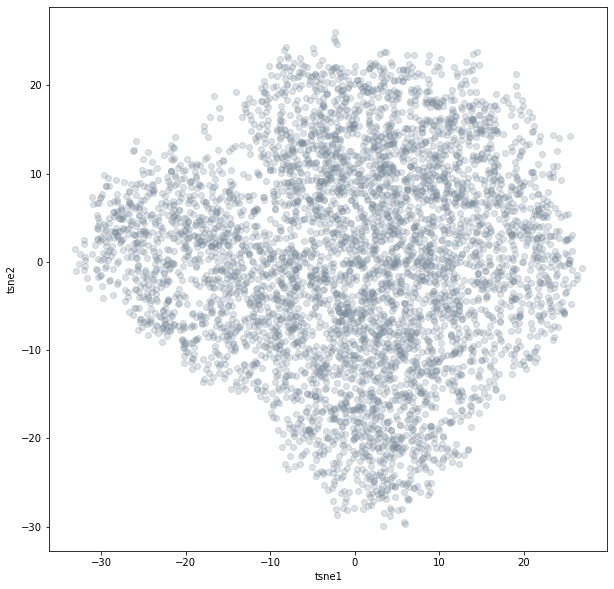

In [103]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Text(0, 0.5, 'Inertia')

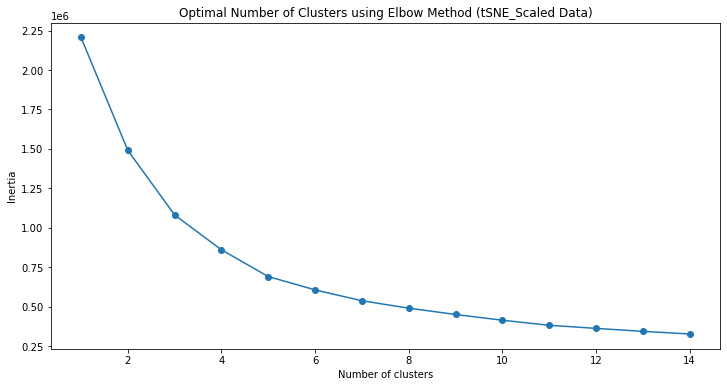

In [104]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [106]:
from sklearn.metrics import silhouette_score
kmeans_tsne = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42)
kmeans_tsne.fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne.labels_, metric='euclidean')))

KMeans tSNE Scaled Silhouette Score: 0.30768707394599915


In [107]:
labels_tsne_scale = kmeans_tsne.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

/Users/xf20939/opt/anaconda3/envs/generalml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


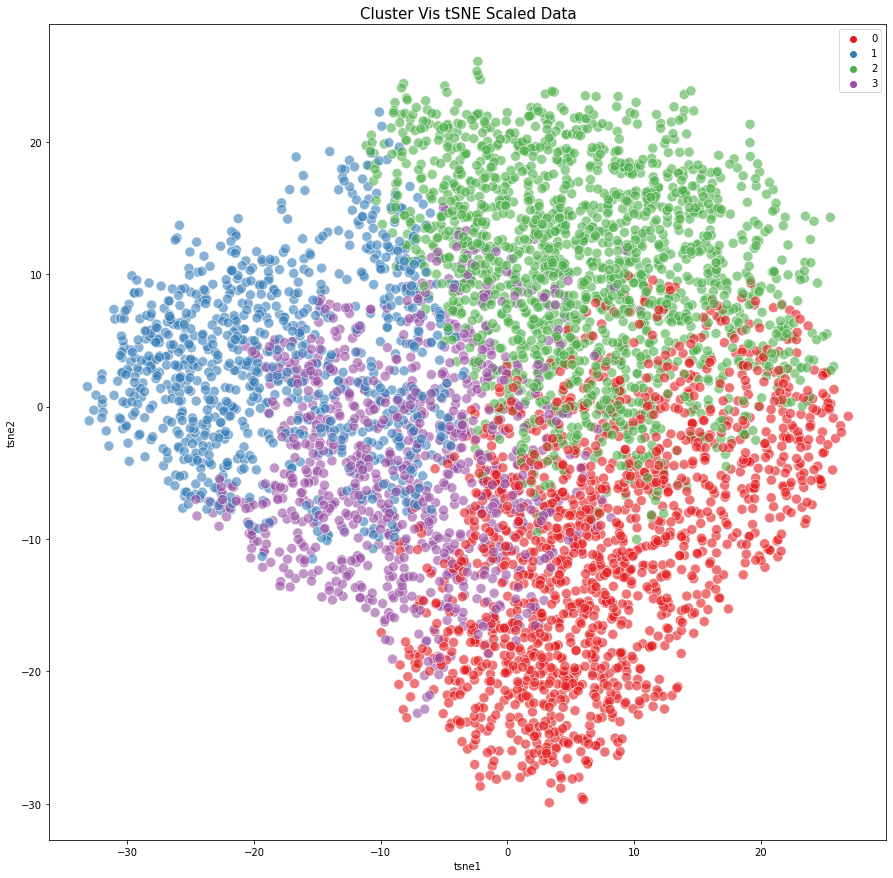

In [108]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show() 

In [109]:
colours = {0:'red', 1:'green', 2:'blue', 3:'yellow'}

In [110]:
clusters_tsne_scale['tsne_clusters'].map(colours)

0         blue
1       yellow
2       yellow
3         blue
4         blue
         ...  
5020       red
5021       red
5022      blue
5023     green
5024     green
Name: tsne_clusters, Length: 5025, dtype: object

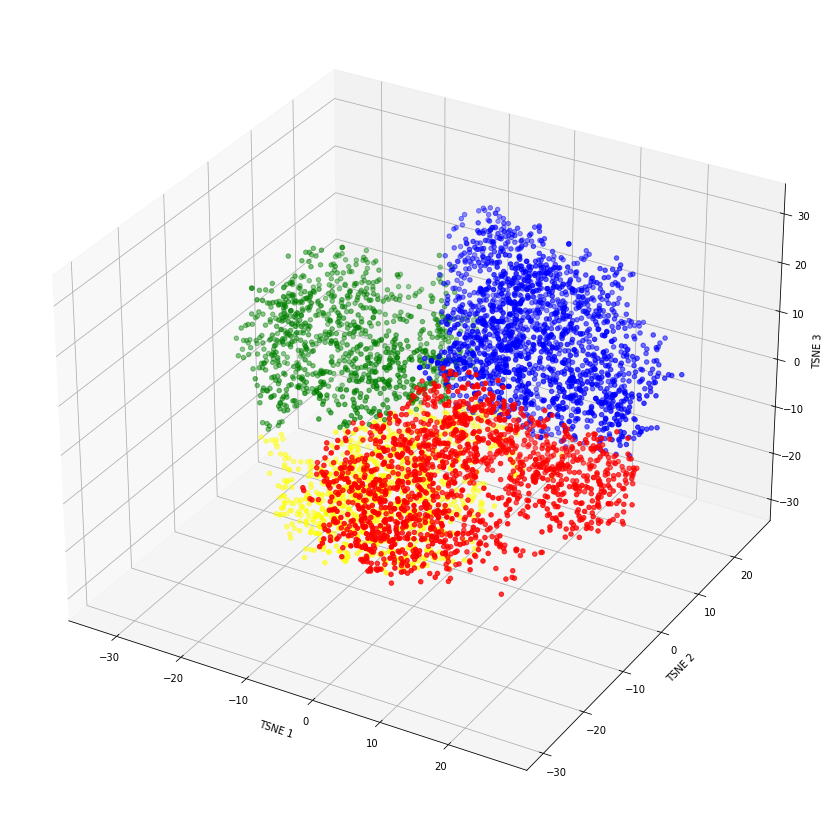

In [111]:
fig = plt.figure(figsize=[15, 15])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.scatter(clusters_tsne_scale.tsne1, clusters_tsne_scale.tsne2, clusters_tsne_scale.tsne3, c=clusters_tsne_scale['tsne_clusters'].map(colours), marker='o')




In [149]:
# now separate out the clusters and get find averages of things for each cluster, compare so you can characterize each cluster

In [ ]:
#try this ag

In [112]:
clusters_tsne_scale.shape

(5025, 4)

In [117]:
clusters_tsne_scale

,tsne1,tsne2,tsne3,tsne_clusters
0,-4.504406,12.834497,21.489408,2
1,-1.236905,-8.839989,-12.839361,3
2,1.877125,-14.363213,-17.890747,3
3,4.618733,14.525354,-7.565751,2
4,1.519337,13.934919,24.620674,2
...,...,...,...,...
5020,15.788172,-7.948612,-4.193368,0
5021,-1.315262,-20.754955,-3.764045,0
5022,-8.119933,14.449008,10.845474,2
5023,-13.888577,3.909101,5.291768,1


In [122]:
lonely_with_clusters = pd.concat([df, clusters_tsne_scale.tsne_clusters], axis=1)
lonely_with_clusters.columns

Index(['depression_zscore', 'alzheimers_zscore', 'blood pressure_zscore',
       'hypertension_zscore', 'diabeties_zscore',
       'cardiovascular disease_zscore', 'insomnia_zscore', 'addiction_zscore',
       'social anxiety_zscore', 'tsne_clusters'],
      dtype='object')

In [123]:
cluster_0 = lonely_with_clusters[lonely_with_clusters.tsne_clusters == 0]
cluster_0

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
16,-0.932872,-1.522566,1.379256,1.398577,-0.709840,1.046207,-0.405818,-0.431915,-0.676866,0
46,-1.071904,-1.731157,-0.176581,-0.221739,0.795526,-0.714292,-0.080932,-0.431915,2.359166,0
51,-1.036782,-1.596447,-0.208202,-0.207421,0.208626,1.560044,0.871359,-0.431915,1.309869,0
53,-1.075579,-1.731157,1.827981,1.825103,0.319655,1.352636,-1.048463,-0.431915,-0.596675,0
54,-1.863622,-1.446340,1.237189,1.177860,0.822491,2.618031,0.150739,-0.431915,0.932260,0
...,...,...,...,...,...,...,...,...,...,...
5017,-1.190075,0.541947,0.418057,0.380464,0.738683,1.654398,-1.060879,-0.362174,-0.186412,0
5018,-1.301641,-0.492948,1.141341,1.162358,0.067036,1.877153,-1.161929,-0.431915,0.418482,0
5019,-0.380291,0.037571,0.120003,0.085237,-1.324653,-0.447853,-1.174561,-0.431915,-0.718801,0
5020,-1.014789,0.287453,1.292602,1.257550,-0.759741,-0.936670,-1.502816,-0.431915,1.690828,0


In [125]:
cluster_1 = lonely_with_clusters[lonely_with_clusters.tsne_clusters == 1]
cluster_1

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
22,-2.133120,-1.731157,-2.311655,-2.299659,1.734469,-1.108082,-0.713978,3.077565,-0.746087,1
31,-0.686803,-1.238479,-0.134478,-0.057508,1.099404,1.447619,1.244417,4.878194,0.698052,1
37,-0.524811,-0.963207,-2.070507,-2.094022,-0.985531,-2.145562,0.247065,4.922527,-0.775777,1
39,-0.438129,-1.395397,-0.550571,-0.559490,-0.003829,-0.201262,-0.444442,4.934150,0.045760,1
59,-1.344998,-1.721605,-1.625972,-1.643216,-0.426186,-1.532083,-0.643222,4.859394,-0.298417,1
...,...,...,...,...,...,...,...,...,...,...
5005,-0.837796,1.914397,-0.522647,-0.538304,-1.150834,0.923045,-2.014472,-0.431915,-1.103037,1
5006,-0.106784,1.384990,-0.015789,-0.046872,-0.847055,0.004691,-1.077982,0.043686,-0.010604,1
5007,0.025827,0.312885,-0.015047,0.021738,-0.727177,0.534623,-1.458576,-0.431915,-1.039423,1
5023,1.020184,0.395935,-0.961777,-1.001080,-1.062678,-0.416650,-1.229300,1.475480,-0.790085,1


In [126]:
cluster_2 = lonely_with_clusters[lonely_with_clusters.tsne_clusters == 2]
cluster_2

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
0,-0.738019,-1.358481,-0.304059,-0.249849,-0.753489,-0.814411,-0.713280,0.168575,-0.138502,2
3,-0.151227,-1.381928,-0.566489,-0.592918,-0.444702,-0.918935,-1.078541,-0.431915,0.097761,2
4,0.077350,-1.247236,-0.475164,-0.410414,-0.114848,-1.235310,0.434279,0.431505,-0.698016,2
8,-0.634606,-1.531580,-1.166640,-1.174359,0.248664,-0.904711,-0.421230,-0.431915,-0.558339,2
9,-0.136207,-1.579745,-0.617055,-0.619392,-0.796412,-1.136871,-0.004024,-0.131377,0.142991,2
...,...,...,...,...,...,...,...,...,...,...
5001,0.796184,0.829404,-1.181141,-1.158553,-0.651586,0.858106,-0.494783,-0.377404,-0.439069,2
5003,1.521790,-0.733947,0.047328,0.026002,-1.117803,-1.665668,-1.054789,-0.431915,0.771284,2
5008,-0.595836,-0.641722,-0.814956,-0.820996,-0.679861,0.311431,-0.173049,-0.374431,0.817428,2
5009,-0.695998,-0.636951,-0.706151,-0.713257,-0.600178,0.550359,-0.046944,-0.431915,0.867173,2


In [128]:
cluster_3 = lonely_with_clusters[lonely_with_clusters.tsne_clusters == 3]
cluster_3

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
1,-0.227578,-1.641863,0.475113,0.440555,0.126110,0.021837,-0.701520,-0.431915,-0.330995,3
2,-0.662180,-1.464802,1.048091,1.114964,0.448033,1.254648,-1.449382,-0.431915,-0.232955,3
5,-2.541894,-1.456275,1.281117,1.391423,2.466004,0.457695,-1.109828,-0.431915,-1.154031,3
6,-1.846338,-1.731157,0.961229,1.095540,0.739086,0.204248,-1.429406,-0.431915,-0.948225,3
7,-1.345836,-1.496457,0.027422,0.097229,-1.105650,0.097929,-1.178243,-0.431915,-0.668160,3
...,...,...,...,...,...,...,...,...,...,...
4967,-2.047486,-0.882891,0.196242,0.460054,2.666723,1.910401,-0.009733,-0.307544,-0.779151,3
4986,-0.581894,-0.624292,0.444017,0.431070,0.347017,1.115261,-0.733335,-0.431915,-0.747140,3
4987,-1.082261,-0.258744,0.631845,0.618889,1.421221,0.459478,-0.989140,-0.431915,0.634016,3
5010,-0.695800,-0.614804,0.919925,0.870341,0.295596,1.320196,-1.154887,-0.431915,-0.366888,3


In [134]:
cluster_0.describe()

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.0
mean,-0.350392,0.132158,0.851938,0.850183,-0.204036,0.610837,-0.145376,-0.339600,0.183807,0.0
std,0.754193,0.976477,0.703112,0.697364,0.713789,0.849269,0.812374,0.250701,1.088614,0.0
min,-2.820818,-1.731157,-1.075711,-0.937992,-2.857867,-2.427343,-2.229060,-0.431915,-1.154031,0.0
25%,-0.849045,-0.598087,0.338531,0.344216,-0.694646,0.029892,-0.712746,-0.431915,-0.663868,0.0
50%,-0.384752,0.033555,0.790252,0.776054,-0.265253,0.645933,-0.211290,-0.431915,-0.116114,0.0
75%,0.150626,0.803015,1.317735,1.325042,0.236725,1.199932,0.349393,-0.407686,0.783632,0.0
max,2.611860,2.616182,2.499156,2.473920,2.746234,2.636987,2.897172,1.615176,3.526169,0.0


In [131]:
cluster_1.describe()

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.0
mean,0.440288,0.190898,-0.233220,-0.237061,-0.157522,-0.106165,-0.162831,1.464431,-0.257579,1.0
std,0.913581,0.939311,0.785047,0.785184,0.853775,0.890670,0.955669,1.571470,0.788832,0.0
min,-2.729502,-1.731157,-2.538912,-2.519837,-2.436946,-2.642881,-2.075019,-0.431915,-1.154031,1.0
25%,-0.118579,-0.505238,-0.761961,-0.763484,-0.695826,-0.757737,-0.868204,0.001310,-0.794993,1.0
50%,0.456661,0.130164,-0.235446,-0.231063,-0.308517,-0.133874,-0.274914,1.205448,-0.482762,1.0
75%,1.070053,0.804861,0.205843,0.196715,0.191573,0.566030,0.379845,2.563344,0.050674,1.0
max,2.712216,2.597673,2.399600,2.397226,3.381634,2.642794,2.962765,5.042775,3.449442,1.0


In [132]:
cluster_2.describe()

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0
mean,0.344488,0.082663,-0.809794,-0.810755,-0.382381,-0.694617,0.527248,-0.322013,0.247067,2.0
std,0.949410,1.037778,0.666728,0.668194,0.737375,0.779964,1.050669,0.258336,1.080805,0.0
min,-2.737952,-1.731157,-2.554789,-2.554285,-2.620877,-2.665922,-2.201597,-0.431915,-1.154031,2.0
25%,-0.314324,-0.716817,-1.247111,-1.251991,-0.842744,-1.221553,-0.280908,-0.431915,-0.585206,2.0
50%,0.337804,-0.011845,-0.793229,-0.795439,-0.428401,-0.738587,0.485284,-0.431915,-0.023183,2.0
75%,0.964138,0.807353,-0.370202,-0.372097,0.043655,-0.162224,1.317322,-0.384884,0.831162,2.0
max,2.727951,2.607907,1.961522,2.091413,2.682801,1.955230,2.990135,1.595601,3.540081,2.0


In [133]:
cluster_3.describe()

,depression_zscore,alzheimers_zscore,blood pressure_zscore,hypertension_zscore,diabeties_zscore,cardiovascular disease_zscore,insomnia_zscore,addiction_zscore,social anxiety_zscore,tsne_clusters
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0
mean,-0.495282,-0.548835,0.325059,0.333395,1.169368,0.377503,-0.554108,-0.328806,-0.482728,3.0
std,1.089524,0.823911,0.831125,0.833427,1.074363,0.860241,0.761100,0.346423,0.563200,0.0
min,-2.816068,-1.731157,-2.456486,-2.464416,-2.060215,-2.412813,-2.247336,-0.431915,-1.154031,3.0
25%,-1.315651,-1.138089,-0.188885,-0.184736,0.374756,-0.206899,-1.109828,-0.431915,-0.913134,3.0
50%,-0.442199,-0.637631,0.344665,0.366134,1.124499,0.315065,-0.606786,-0.431915,-0.605900,3.0
75%,0.331824,-0.142000,0.896275,0.906201,1.942385,0.961441,-0.055588,-0.418865,-0.174559,3.0
max,2.291471,2.534617,2.481996,2.491361,3.382671,2.654474,2.214132,2.979656,1.836112,3.0
